In [280]:
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
import numpy as np

In [281]:
test_split = 0.2
max_depth = 3

In [282]:
data = load_wine()
list_fl = data.target_names
x = data.data
y = data.target

In [283]:
x[:2], y[:2]

(array([[1.423e+01, 1.710e+00, 2.430e+00, 1.560e+01, 1.270e+02, 2.800e+00,
         3.060e+00, 2.800e-01, 2.290e+00, 5.640e+00, 1.040e+00, 3.920e+00,
         1.065e+03],
        [1.320e+01, 1.780e+00, 2.140e+00, 1.120e+01, 1.000e+02, 2.650e+00,
         2.760e+00, 2.600e-01, 1.280e+00, 4.380e+00, 1.050e+00, 3.400e+00,
         1.050e+03]]),
 array([0, 0]))

In [284]:
np.std(x)

215.74620420485243

In [285]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(x)

In [286]:
np.std(X_scaled)

1.0

In [287]:
print(data['DESCR'])

.. _wine_dataset:

Wine recognition dataset
------------------------

**Data Set Characteristics:**

:Number of Instances: 178
:Number of Attributes: 13 numeric, predictive attributes and the class
:Attribute Information:
    - Alcohol
    - Malic acid
    - Ash
    - Alcalinity of ash
    - Magnesium
    - Total phenols
    - Flavanoids
    - Nonflavanoid phenols
    - Proanthocyanins
    - Color intensity
    - Hue
    - OD280/OD315 of diluted wines
    - Proline
    - class:
        - class_0
        - class_1
        - class_2

:Summary Statistics:

============================= ==== ===== ======= =====
                                Min   Max   Mean     SD
============================= ==== ===== ======= =====
Alcohol:                      11.0  14.8    13.0   0.8
Malic Acid:                   0.74  5.80    2.34  1.12
Ash:                          1.36  3.23    2.36  0.27
Alcalinity of Ash:            10.6  30.0    19.5   3.3
Magnesium:                    70.0 162.0    99.7  14.3

In [288]:
x_train, x_test, y_train, y_test = train_test_split(X_scaled, y, test_size=test_split, random_state=42)

In [289]:
model = DecisionTreeClassifier(random_state=42, max_depth=max_depth)

model.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=42)

In [290]:
predictions = model.predict(x_test)

In [291]:
predictions[:5], list(map( lambda x: list_fl[x], list(predictions)))[:5]

(array([0, 0, 2, 0, 1]),
 ['class_0', 'class_0', 'class_2', 'class_0', 'class_1'])

In [292]:
# F1 Score: 2 * (Precision * Recall) / (Precision + Recall)

report = classification_report(y_test, predictions, target_names=list_fl)
print(report)

              precision    recall  f1-score   support

     class_0       1.00      0.93      0.96        14
     class_1       0.88      1.00      0.93        14
     class_2       1.00      0.88      0.93         8

    accuracy                           0.94        36
   macro avg       0.96      0.93      0.94        36
weighted avg       0.95      0.94      0.94        36



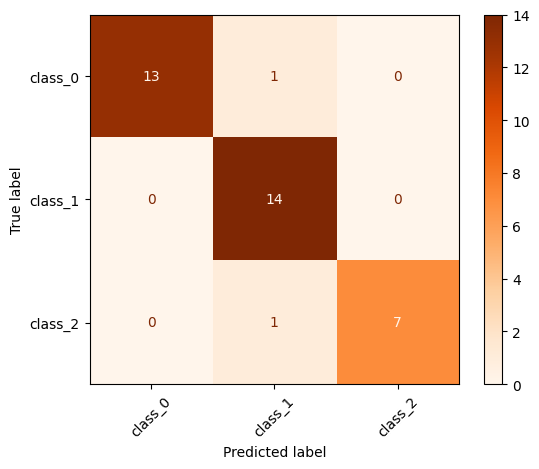

In [293]:
confusion_matrix = metrics.confusion_matrix(y_test, predictions)
show_cm = metrics.ConfusionMatrixDisplay(confusion_matrix, display_labels=list_fl)
show_cm.plot(xticks_rotation=45, cmap='Oranges')